170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.5733 - accuracy: 0.4238 - val_loss: 1.4116 - val_accuracy: 0.4959
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2246 - accuracy: 0.5659 - val_loss: 1.1315 - val_accuracy: 0.5922
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0630 - accuracy: 0.6245 - val_loss: 1.0155 - val_accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9604 - accuracy: 0.6626 - val_loss: 0.9764 - val_accuracy: 0.6557
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8774 - accuracy: 0.6923 - val_loss: 0.9487 - val_accuracy: 0.6711
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8121 - accuracy: 0.7154 - val_loss: 0.9638 - val_accuracy: 0.6626
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step 

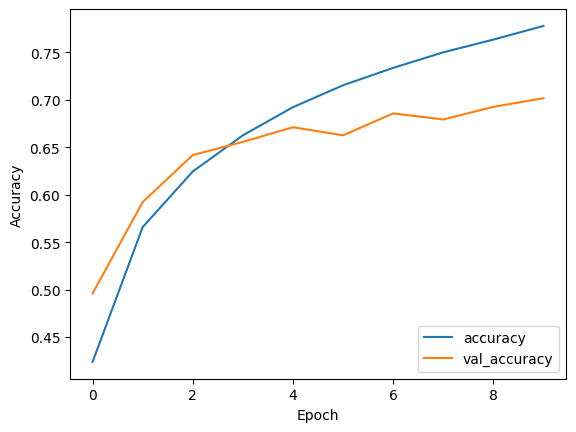

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
